###  Handling Outliers

### Which Algos are sensitive to Outlers
1. Naviye Ba**YES** Classifier---------------- **NO**
<br/>
2. SVM------------------------------------**NO**
<br/>

3. Linear Regression----------------------**YES**
<br/>

4. Logistic Regression--------------------**YES**
<br/>

5. Decision Tree Regressor or Classofier--**NO**
<br/>

6. Ensemble(Random Forest, XGBoost, GB)---**NO**
<br/>

7. KNN------------------------------------**NO**
<br/>

8. Kmeans---------------------------------**YES**
<br/>

9. Hierarchical --------------------------**YES**
<br/>

10. PCA-----------------------------------**YES**
<br/>

11. Neural Networks-----------------------**YES**

In [14]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('../DataSet/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [16]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

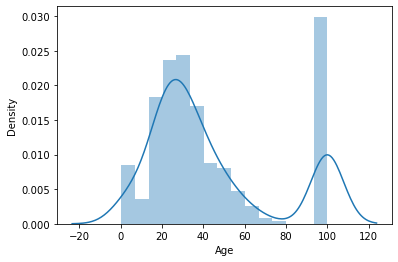

In [18]:
sns.distplot(df['Age'].fillna(100))


<AxesSubplot:xlabel='Age'>

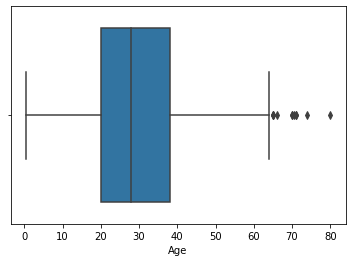

In [19]:
sns.boxplot(df['Age'].dropna())

### Gausian Distributed

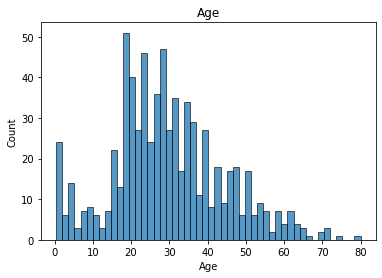

In [35]:
def plot(df, feature):
    figure = sns.histplot(df[feature], bins=50)
    figure.set_title(feature)

plot(df, 'Age')

#### If Data is normally distrubuted we use the following methode

In [36]:
def outliers_boundary(df, feature):
    upper_boundary=df[feature].mean() + 3 * df[feature].std()
    lower_boundary=df[feature].mean() - 3 * df[feature].std()
    print('Lower Boundary =', lower_boundary)
    print('Upper Boundary =', upper_boundary)
    print(feature,'Mean =', df[feature].mean())

outliers_boundary(df,'Age')

Lower Boundary = -13.88037434994331
Upper Boundary = 73.27860964406095
Age Mean = 29.69911764705882


#### If the Data is Skewed then we use the following method

<AxesSubplot:xlabel='Fare'>

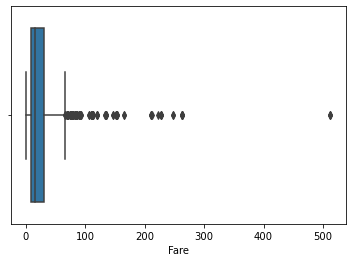

In [38]:
sns.boxplot(df.Fare)

In [41]:
def outliers_IQR(df, feature):
    IQR = df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_bridge = df[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = df[feature].quantile(0.75)+(IQR*1.5)
    print('Lower Bridge =', lower_bridge), print('Upper Bridge =', upper_bridge)
    print()

    #### Extreme outliers
    lower_bridge = df[feature].quantile(0.25)-(IQR*3)
    upper_bridge = df[feature].quantile(0.75)+(IQR*3)
    print('Extreme Lower Bridge', lower_bridge), print('Extreme Upper Bridge', upper_bridge)

outliers_IQR(df,'Fare')


    


Lower Bridge = -26.724
Upper Bridge = 65.6344

Extreme Lower Bridge -61.358399999999996
Extreme Upper Bridge 100.2688


#### Removing the outliers

In [43]:
data=df.copy()
data.loc[data['Age'] >= 73, 'Age'] = 73
data.loc[data['Fare'] >= 100, 'Fare'] = 100
